### Data Wrangling Project
### 1. Data Gathering

In [2]:
# Import all the used libraries for this project
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl

In [2]:
arch_df = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-prediction.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
image_df = pd.read_csv('image-prediction.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Note:
Since i was unable to create a tweeter developer account, i can't acquire the data using the `tweepy` `api`.
However, i know this is important to me to actually be able to do it, i will work on this issue on my own ofter this project. Just to avoid being stucked with time.

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
tweet_df = pd.read_json('tweet_json.txt', lines=True)

# To save the json file to csv
tweet_df.to_csv('tweet_json.csv', index=False)

# Read the first 2 rows
tweet_df.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [6]:
# Create a dataframe from the json file to a csv file using panda
tweet_df = pd.read_csv('tweet_json.csv')
tweet_df.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### 2. Data assessment
Visual assessment

In [7]:
### Display the archive table
arch_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
# Display the image table
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
# Display the tweet table
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Programmatical assessment

### a. Assess the archive enhanced table

In [10]:
### Display the first 5 rows
arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# Display the sample of the archive table iin 20 rows
arch_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,pupper,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344...,4,10,None,None,None,None,None
1729,679862121895714818,NaN,NaN,2015-12-24 03:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman I'm jus trynna lik the fler"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/679862121...,11,10,None,None,None,None,None
2004,672466075045466113,NaN,NaN,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,None,None,None,None
1495,692535307825213440,NaN,NaN,2016-01-28 02:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amber. She's a Fetty Woof. 10/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692535307...,10,10,Amber,None,None,None,None
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547...,12,10,None,None,None,None,None
868,761750502866649088,NaN,NaN,2016-08-06 02:27:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Tristan do not speak to me wit...",6.853251e+17,4.196984e+09,2016-01-08 05:00:14 +0000,https://twitter.com/dog_rates/status/685325112...,10,10,None,None,None,None,None
350,831552930092285952,NaN,NaN,2017-02-14 17:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dutch. He dressed up as his favorite e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831552930...,13,10,Dutch,None,None,None,None
906,758041019896193024,NaN,NaN,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019...,9,10,None,None,None,None,None
1716,680206703334408192,NaN,NaN,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680206703...,12,10,Toby,None,None,None,None


In [12]:
# Display the info
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
type(arch_df.timestamp[0])

str

In [14]:
arch_df.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [15]:
arch_df.duplicated().sum()

0

In [16]:
arch_df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/786233965241827333/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/681694085539872773/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_r

In [17]:
arch_df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Rudy         1
Pumpkin      1
Goose        1
Bauer        1
Stefan       1
Name: name, Length: 957, dtype: int64

In [18]:
arch_df.name.nunique()

957

In [19]:
arch_df.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [20]:
arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
arch_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [22]:
arch_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

### b. Assessing the image table

In [23]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
151,668643542311546881,https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg,1,common_iguana,0.483972,False,frilled_lizard,0.111377,False,sandbar,0.078983,False
1283,750429297815552001,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
231,670411370698022913,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.584397,True,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True
1241,747103485104099331,https://pbs.twimg.com/media/Cl4-pevXEAAb8VW.jpg,1,Labrador_retriever,0.991954,True,golden_retriever,0.002228,True,doormat,0.001404,False
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
1078,717790033953034240,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,car_mirror,0.819106,False,minibus,0.107383,False,cab,0.034846,False
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
650,681981167097122816,https://pbs.twimg.com/media/CXbiQHmWcAAt6Lm.jpg,1,Labrador_retriever,0.452577,True,golden_retriever,0.403420,True,beagle,0.069486,True
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True


In [25]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_df.duplicated().sum()

0

In [27]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### c. Assessing the tweet table

In [28]:
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [29]:
tweet_df.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1690,2015-12-28 02:35:15+00:00,681302363064414209,681302363064414208,This is Chuck. He's a neat dog. Very flexible....,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 681302357297229824, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4347,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1316,2016-03-06 17:52:42+00:00,706538006853918722,706538006853918720,"This is Oliver (pronounced ""Ricardo""). He's a ...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 706537990542254082, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3778,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
556,2016-11-28 23:30:47+00:00,803380650405482500,803380650405482496,Meet Sonny. He's an in-home movie critic. That...,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 803380639571513345, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8601,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
172,2017-04-30 00:02:42+00:00,858471635011153920,858471635011153920,This is Sophie. She just arrived. Used paworit...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 858471621065150464, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,22640,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1126,2016-05-10 00:01:12+00:00,729823566028484608,729823566028484608,This is Stefan. He's a downright remarkable pu...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 729823553781108736, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4358,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
873,2016-08-04 15:48:47+00:00,761227390836215808,761227390836215808,This is Albert. He just found out that bees ar...,False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761227386398633985, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1934,2015-12-07 20:07:04+00:00,673956914389192708,673956914389192704,This is one esteemed pupper. Just graduated co...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673956906873036801, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2091,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
21,2017-07-19 03:39:09+00:00,887517139158093824,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. Th...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 887517108413886465, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,46959,True,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2005,2015-12-03 04:01:02+00:00,672264251789176834,672264251789176832,This is Kreg. He has the eyes of a tyrannical ...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672264243945844736, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1212,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1154,2016-04-26 01:26:53+00:00,724771698126512129,724771698126512128,Nothin better than a doggo and a sunset. 11/10...,False,"[0, 46]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 724771676257284096, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2593,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [30]:
tweet_df.retweet_count.value_counts()

3652    5
1972    5
83      5
819     4
115     4
       ..
1526    1
230     1
1522    1
5616    1
7       1
Name: retweet_count, Length: 1724, dtype: int64

In [31]:
tweet_df.favorite_count.value_counts()

0        179
2918       3
2706       3
2768       3
1691       3
        ... 
7493       1
5444       1
5442       1
7489       1
24574      1
Name: favorite_count, Length: 2007, dtype: int64

In [32]:
tweet_df.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [33]:
tweet_df.duplicated().sum()

0

In [34]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   int64  
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

In [35]:
tweet_df[tweet_df.isnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Detection and documentation

#### 1) Quality
__1.a For tweeter archive enhenced table__

- tweet_id should be "string" not "int"
- some values in rating_denominator column are not (10)
- some values in rating_numerator column are less than (10)
- some values in rating_numerator column are zero (0)
- timestamp should be "data time" not "str"
- retweeted_status_id should be removed because we are only interested in tweet
- retweeted_status_user_id should be removed because we are only interested in tweet
- retweeted_status_timestamp should be removed because we are only interested in tweet
- Nulls represented as (none) in name column
- some of expanded_urls rows have 2 urls while we just need tweeter link
- 59 missing value in expanded_urls column
- some values in rating_numerator column over ratted
- Something strange ('a', 'an') in name column

__1.b For image predictions table__

- tweet_id should be "string" not "int"
- names p columns have some uppercase letter and some lowercase letter
- missing id's there are '2075' instead of '2353'

__1.c For the tweet table__

- id column name should be "tweet_id" instead of "id"
- tweet_id should be "string" not "int"
- missing id 2075 instead, we have 2324

#### 2) Tidiness
__2.a For tweeter archive enhenced table__

- dogo, flooter, pupper and puppo should not be all in one column, they should be in single columns

__2.b For the image predictions table__

- the column "confg" shouldn't be abbreviated, it should instead be written as a whole (configuration)

__2.c For the Tweet table__

- We only need the [id, favorite_count and retweet_count] columns in the dataframe

__For all 2.a, 2.b, 2.c tables__
- Merge all three tables together

### 3. Cleanig data

In [12]:
# Make copies of all three tables
arch_clean = arch_df.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()

### Tidiness

__ We only need the [id, favorite_count and retweet_count] columns in the dataframe__
#### Define
Make create a datafame of only 3 columns using pandas.DataFrame method

#### code


In [13]:
# filter the table to remain with id, favorite_count and retweet_count columns
tweet_clean = pd.DataFrame(tweet_clean, columns=['id', 'favorite_count', 'retweet_count'])

#### Test

In [14]:
# Display the list of columns in the new tweet_clean dataframe
list(tweet_clean)

['id', 'favorite_count', 'retweet_count']

In [15]:
# Display the first 3 rows of the tweet table
tweet_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


__ dogo, flooter, pupper and puppo shouldn't be in 4 columns, they should be in one single column__
#### Define
Use the extract string method to combine the four columns
#### Code

In [16]:
# extract the strings (doggo, floofer, puppo, pupper) to make them columns
arch_clean['Dog_stage'] = arch_clean['text'].str.extract('(doggo|floofer|puppo|pupper)')

# Drop the real columns
arch_clean = arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [17]:
# Diplay the number of doggo, floofer, pupper and puppo are in the archive table
arch_clean.Dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: Dog_stage, dtype: int64

__Combine all three tables together__
#### Define
Merge the tables using the merge pandas method
#### Code
But before we do that let modify the id column to be tweet_id in the `tweet_clean` table. This is one of the quality issues we mensioned in the documentation above

In [18]:

tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [19]:
# Lest test by displaying the tweet_clean colums
tweet_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853


In [20]:
# Merge the arch_clean with the image_clean table
archive_twitter_clean = pd.merge(arch_clean, image_clean, on= 'tweet_id', how = 'left')

# Merge the arch_clean with the tweet_clean table
archive_twitter_clean = pd.merge(archive_twitter_clean, tweet_clean, on= 'tweet_id', how= 'left')

#### Test

In [21]:
# Display the fist 2 rows on the new merged table
archive_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


In [22]:
archive_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'Dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

__the column end with "conf" shouldn't be abbreviated, it should instead be written as a whole (confident)__
#### Define
Rename the columns with conf to end with configuration
#### code

In [23]:
archive_twitter_clean.rename(columns={'p1_conf': 'p1_confident',
                                    'p2_conf': 'p2_confident',
                                    'p3_conf': 'p3_confident'}, inplace=True)

#### Test

In [24]:
archive_twitter_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0


### Quality issues

__tweet_id should be "string" not "int"__
#### Define
Conver tweet_id column to string datatype
#### Code

In [25]:
archive_twitter_clean.tweet_id = archive_twitter_clean.tweet_id.astype(str)

#### Test


In [26]:
type(archive_twitter_clean.tweet_id[0])

str

__some values in rating_denominator column are not (10)__
#### Define
Replace any value in the reating_denominator column that has a value less than 10 to have 10
#### Code

In [27]:
archive_twitter_clean.rating_denominator = archive_twitter_clean.rating_denominator.replace(range(0, 1000), 10)

In [28]:
# Check if there is an rating denominator value less than 10
archive_twitter_clean.query("rating_denominator > 10").rating_denominator.any()

False

In [29]:
archive_twitter_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

__some values in rating_numerator column are less than (10)__
__some values in rating_numerator column are zero (0)__
#### Difine
add (10) to all values in rating_numerator column that are less than 10 or equal to 0
#### Code

In [30]:
archive_twitter_clean.rating_numerator[archive_twitter_clean['rating_numerator'] <= 10 ] = archive_twitter_clean.rating_numerator[archive_twitter_clean['rating_numerator'] <= 10 ].add(10)

<ipython-input-30-4a2aa6b5abf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_twitter_clean.rating_numerator[archive_twitter_clean['rating_numerator'] <= 10 ] = archive_twitter_clean.rating_numerator[archive_twitter_clean['rating_numerator'] <= 10 ].add(10)


In [31]:
archive_twitter_clean.rating_numerator.value_counts()

12      567
11      473
20      462
13      370
19      158
18      102
14       71
17       56
15       39
16       32
420       2
10        2
75        2
27        1
45        1
1776      1
99        1
121       1
143       1
204       1
960       1
666       1
182       1
144       1
88        1
84        1
80        1
60        1
50        1
44        1
26        1
24        1
165       1
Name: rating_numerator, dtype: int64

In [32]:
archive_twitter_clean.query('rating_numerator <= 10').rating_numerator.sum()

20

Issues:
- __in_reply_to_status_id should be removed that have values__
- __in_reply_to_user_id should be removed that have values__
- __retweeted_status_id should be removed that have values__
- __retweeted_status_user_id should be removed that have values__
- __retweeted_status_timestamp should be removed that have values__

In [33]:
#archive_twitter_clean = archive_twitter_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])
archive_twitter_clean = archive_twitter_clean[archive_twitter_clean.in_reply_to_status_id.isnull()]
archive_twitter_clean = archive_twitter_clean[archive_twitter_clean.in_reply_to_user_id.isnull()]
archive_twitter_clean = archive_twitter_clean[archive_twitter_clean.retweeted_status_id.isnull()]
archive_twitter_clean = archive_twitter_clean[archive_twitter_clean.retweeted_status_user_id.isnull()]
archive_twitter_clean = archive_twitter_clean[archive_twitter_clean.retweeted_status_timestamp.isnull()]

In [34]:
archive_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  Dog_stage                   353 n

__timestamp should be "data time" not "str"__
#### Define
Convert timestamp to data time type
#### Code

In [35]:
import datetime
archive_twitter_clean['timestamp'] = pd.to_datetime(archive_twitter_clean['timestamp'])

#### Test

In [36]:
type(archive_twitter_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

__Nulls represented as (none) in name column__
#### Define
Replace the "none" with numpy method to give it a value of nan
#### Code

In [37]:
archive_twitter_clean.name = arch_clean.name.replace("None", value = np.nan)

#### Test

In [38]:
archive_twitter_clean.name.isnull().sum()

603

__ names p columns have some uppercase letter and some lowercase letter__
#### Define
Conver the string of p1, p2, p3 all to uppercase
#### Code

In [39]:
archive_twitter_clean['p1'] = archive_twitter_clean['p1'].str.title()
archive_twitter_clean['p2'] = archive_twitter_clean['p2'].str.title()
archive_twitter_clean['p3'] = archive_twitter_clean['p3'].str.title()

In [40]:
archive_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,41048.0,9774.0


__Something strange found ('a', 'an') in the `name` column__
##### Define
Replace all values with text like (a, an, 'none', 'None', 'so', by') with the numpy method to make na `Null` values
##### Code

In [41]:
unwanted_list = ['a', 'an', 'none', 'None', 'so', 'by', 'this', 'the']
for nm in archive_twitter_clean.name:
    if nm in unwanted_list:
        archive_twitter_clean['name'] = archive_twitter_clean.name.replace(unwanted_list, value = np.nan)

##### Test

In [42]:
archive_twitter_clean.name.value_counts()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
           ..
Strudel     1
Eevee       1
Venti       1
Katie       1
Crumpet     1
Name: name, Length: 949, dtype: int64

In [43]:
archive_twitter_clean.name.isnull().sum()

674

In [44]:
archive_twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'Dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_confident', 'p1_dog', 'p2', 'p2_confident', 'p2_dog', 'p3',
       'p3_confident', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

### 4. Store the data

In [45]:
archive_twitter_clean.to_csv('twitter_archive_master.csv', index = False)

In [46]:
# Storing it into a sql lite database too
import sqlite3
database = "twitter_archive_master.sqlite"
conn = sqlite3.connect(database)

archive_twitter_clean.to_sql('database_archive_twitter', con=conn, if_exists='replace', index=False)
conn.close()

### 5. Analyzing and visualizinng Data

In [3]:
# Crate an new dataframe from the clean data stored recently as csv
df = pd.read_csv('twitter_archive_master.csv')

# Read the first 5 rows
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,41048.0,9774.0


In [48]:
# discribe the data
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,img_num,p1_confident,p2_confident,p3_confident,favorite_count,retweet_count
count,2.097000e+03,0.0,0.0,0.0,0.0,0.0,2097.000000,2097.0,1971.000000,1971.000000,1.971000e+03,1.971000e+03,2097.000000,2097.000000
mean,7.365594e+17,NaN,NaN,NaN,NaN,NaN,16.266571,10.0,1.201928,0.594558,1.345850e-01,6.016556e-02,8980.902241,2841.667620
std,6.710178e+16,NaN,NaN,NaN,NaN,NaN,40.305986,0.0,0.559020,0.272126,1.010527e-01,5.094156e-02,12199.636684,4709.238203
min,6.660209e+17,NaN,NaN,NaN,NaN,NaN,10.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,6.768197e+17,NaN,NaN,NaN,NaN,NaN,12.000000,10.0,1.000000,0.363091,5.339800e-02,1.608055e-02,2046.000000,644.000000
50%,7.098528e+17,NaN,NaN,NaN,NaN,NaN,13.000000,10.0,1.000000,0.587764,1.173970e-01,4.944380e-02,4196.000000,1405.000000
75%,7.877176e+17,NaN,NaN,NaN,NaN,NaN,19.000000,10.0,1.000000,0.847827,1.955655e-01,9.153815e-02,11416.000000,3285.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,NaN,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


In [49]:
# Generate a function for the visualisations
def plotting_them(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

    return plotting_them
color = sns.color_palette()[0]

# Specify the figsize
mpl.rcParams['figure.figsize'] = 11.69, 8.27

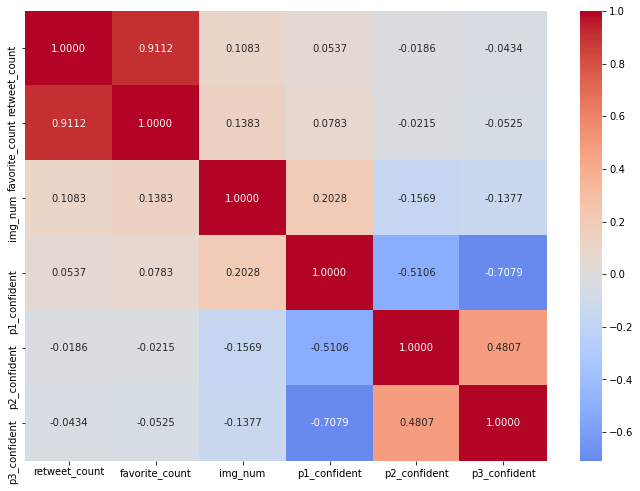

In [50]:
# plot the relationship betwen numeric colums in the dataframe using a heatmap
numeric_col = df[['retweet_count', 'favorite_count', 'img_num', 'p1_confident', 'p2_confident', 'p3_confident']]
sns.heatmap(numeric_col.corr(), annot = True, fmt = '.4f', cmap = 'coolwarm', center = 0);

##### Insigtts
- The only relationship we can mention here, is the strong positive correlation between the retweets count & favorite count. and that makes sense.
- And we can say that the more images the tweet has, the more likely to get retweets & favorites

array([[<AxesSubplot:title={'center':'retweet_count'}>,
        <AxesSubplot:title={'center':'favorite_count'}>],
       [<AxesSubplot:title={'center':'img_num'}>,
        <AxesSubplot:title={'center':'p1_confident'}>],
       [<AxesSubplot:title={'center':'p2_confident'}>,
        <AxesSubplot:title={'center':'p3_confident'}>]], dtype=object)

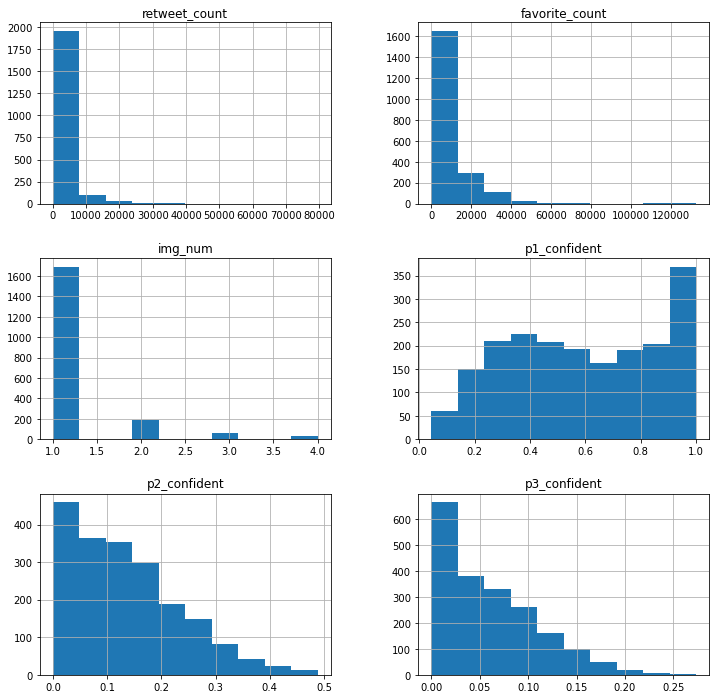

In [51]:
numeric_col.hist(figsize=(12,12))

##### Insights
- Only the p1_confident is left skewed, that means it is where the most values occurred at.
- The Rest of numeric columns are right skewed

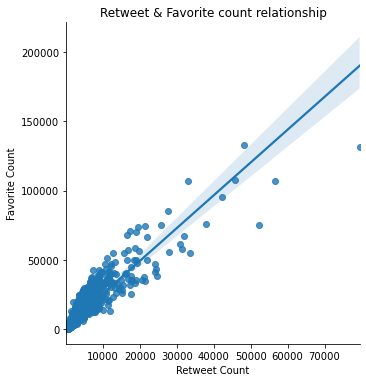

In [52]:
# Let's show a scatter plot that demostrate the relationship between the retweets & favorites count.
sns.lmplot(data=df, x='retweet_count', y='favorite_count')

#Titles and labels
plotting_them('Retweet Count', 'Favorite Count', 'Retweet & Favorite count relationship');

#### Insights
- Most of tweets had retweets less than 10,000 and favorites up to 32,000.
- We have a few tweets that got much more favorites & retweets.

### Sucess rate dog

In [53]:
df.p1_dog.value_counts()

True     1463
False     508
Name: p1_dog, dtype: int64

In [54]:
df.p2_dog.value_counts()

True     1480
False     491
Name: p2_dog, dtype: int64

In [55]:
df.p3_dog.value_counts()

True     1431
False     540
Name: p3_dog, dtype: int64

In [56]:
success_p1 = (1532/(1532+543))*100
success_p1

73.83132530120481

In [57]:
success_p2 = (1553/(1553+522))*100
success_p2

74.8433734939759

In [58]:
success_p3 = (1499/(1499+576))*100
success_p3

72.2409638554217

([<matplotlib.patches.Wedge at 0x1826d88dac0>,
 [Text(0.6469112827761432, 1.127610656306921, 'p1'),
  Text(-1.39964197055511, -0.031659978847270766, 'p2'),
  Text(0.6722460414105133, -1.112692796690935, 'p3')],
 [Text(0.39809925093916493, 0.6939142500350282, '33.4%'),
  Text(-0.899769838213999, -0.02035284354467406, '33.9%'),
  Text(0.4136898716372388, -0.6847340287328831, '32.7%')])

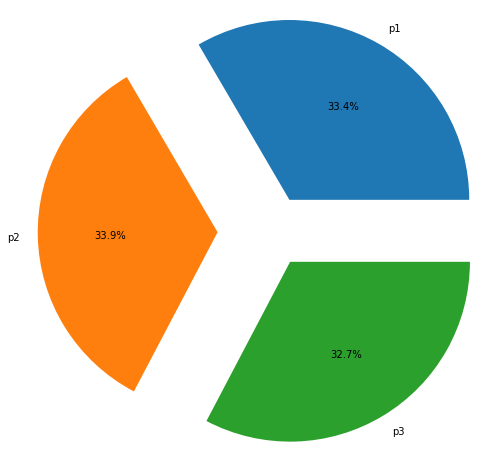

In [59]:
plt.pie([success_p1,success_p2,success_p3],labels=('p1','p2','p3'), explode = [0.2,0.3,0.2],autopct ='%1.1f%%')

##### Insights
- p2_algorithm is The most successful algorithm
- p3_algorithm is The least successful algorithm

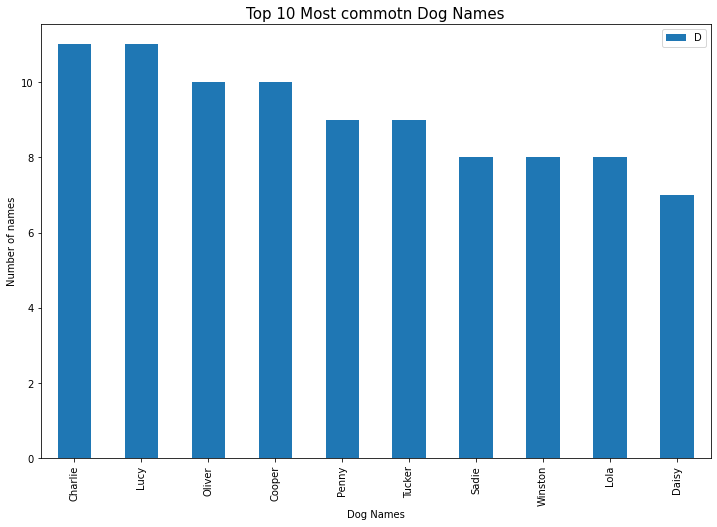

In [13]:
# Bar chart on name
from turtle import title


df.name.value_counts().iloc[:10].plot(kind='bar', figsize=(12, 8), x='Dog Names', y= "Number of names", title="Top 10 Most commotn Dog Names", legend="Dog names frequecy")

plt.xlabel('Dog Names')
plt.ylabel("Number of names")
plt.title("Top 10 Most commotn Dog Names", fontsize=15, pad=5)
plt.legend("Dog names frequecy")

##### Insights
- The top 10 most common names are Lucy, Charlie, Oliver,  Cooper, Penny, Tucker, Sadie, Lola, Winston and Daisy
- Lucy and Charly have the same number of common names
- Lucy, charlie Oliver and Cooper are the top 10 names to be common in more than 9 times